In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from numpy.random import RandomState

_PRNG = RandomState(0)

In [2]:
_FILE_ORIGINAL_DATASET="data/LoanStats_2018Q3.csv"

df = pd.read_csv(_FILE_ORIGINAL_DATASET)

C:\Users\juszhan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000,60 months,17.97%,507.55,D,D1,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,25000,25000,25000,60 months,13.56%,576.02,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,30000,30000,30000,36 months,18.94%,1098.78,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,6000,6000,6000,36 months,7.84%,187.58,A,A4,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,10650,10650,10650,36 months,7.84%,332.95,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [5]:
blank_columns = [col for col in df.columns if all(df[col].isnull())]
blank_columns

['id', 'member_id', 'url', 'desc']

In [6]:
df.drop(columns=blank_columns, inplace=True)

In [7]:
loan_by_grade = df["grade"].value_counts().to_dict()
loan_by_grade

{'A': 37381,
 'B': 34776,
 'C': 31573,
 'D': 18053,
 'E': 4956,
 'F': 1183,
 'G': 272}

In [8]:
loan_by_sub_grade = df["sub_grade"].value_counts().to_dict()
loan_by_sub_grade

{'A1': 9472,
 'B4': 8229,
 'A4': 7968,
 'B2': 7378,
 'A5': 7169,
 'C1': 7044,
 'B1': 6821,
 'A3': 6678,
 'C3': 6631,
 'B5': 6625,
 'C2': 6144,
 'A2': 6094,
 'C4': 5957,
 'C5': 5797,
 'B3': 5723,
 'D1': 4263,
 'D2': 4073,
 'D3': 3551,
 'D4': 3133,
 'D5': 3033,
 'E5': 1251,
 'E1': 1011,
 'E3': 969,
 'E2': 912,
 'E4': 813,
 'F1': 470,
 'F2': 266,
 'F3': 194,
 'G1': 185,
 'F5': 129,
 'F4': 124,
 'G2': 39,
 'G3': 24,
 'G5': 15,
 'G4': 9}

In [9]:
sorted_grade = np.argsort(list(loan_by_grade.keys()))

grade = np.array(list(loan_by_grade.keys()))
grade_count = np.array(list(loan_by_grade.values()))

grade_count[sorted_grade]

array([37381, 34776, 31573, 18053,  4956,  1183,   272])

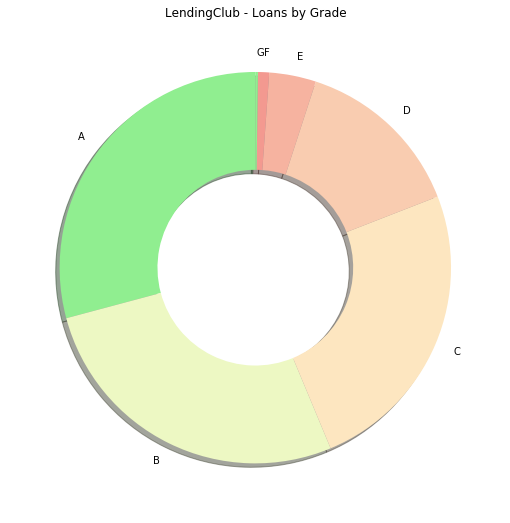

In [10]:
from matplotlib.colors import Normalize
from matplotlib.colors import LinearSegmentedColormap


plt.figure(figsize=(16,9))

vmin = 0
vmax = len(loan_by_grade) - 1

_NORMALIZE = Normalize(vmin=vmin, vmax=vmax)
custom_color_range = [[_NORMALIZE(vmin), "lightgreen"],
                      [_NORMALIZE(vmax/5), "lemonchiffon"],
                      [_NORMALIZE(vmax), "lightcoral"]]

# _COLORMAP = plt.cm.ScalarMappable(cmap=plt.cm.Wistia)
_COLORMAP = LinearSegmentedColormap.from_list("", custom_color_range, N=vmax+1)

colors = _COLORMAP(list(range(0, vmax)))
# lightcoral
# lightgreen

plt.pie(grade_count[sorted_grade], labels=grade[sorted_grade], wedgeprops=dict(width=0.5), colors=colors, startangle=90, shadow=True)
plt.title("LendingClub - Loans by Grade")

plt.show()

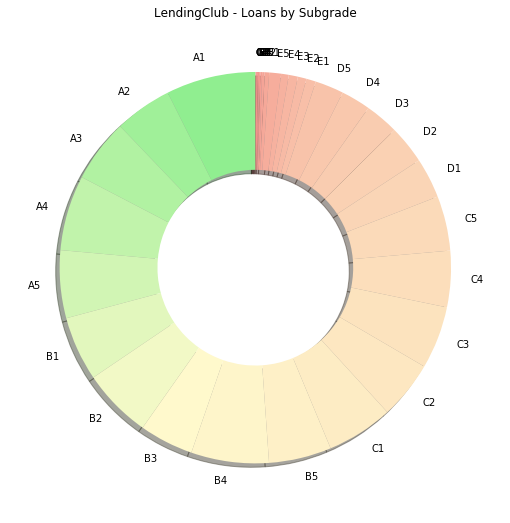

In [11]:
sorted_sub_grade = np.argsort(list(loan_by_sub_grade.keys()))

sub_grade = np.array(list(loan_by_sub_grade.keys()))
sub_grade_count = np.array(list(loan_by_sub_grade.values()))



plt.figure(figsize=(16,9))

vmin = 0
vmax = len(loan_by_sub_grade) - 1

_NORMALIZE = Normalize(vmin=vmin, vmax=vmax)
custom_color_range = [[_NORMALIZE(vmin), "lightgreen"],
                      [_NORMALIZE(vmax/5), "lemonchiffon"],
                      [_NORMALIZE(vmax), "lightcoral"]]

# _COLORMAP = plt.cm.ScalarMappable(cmap=plt.cm.Wistia)
_COLORMAP = LinearSegmentedColormap.from_list("", custom_color_range, N=vmax+1)

colors = _COLORMAP(list(range(0, vmax)))
# lightcoral
# lightgreen

plt.pie(sub_grade_count[sorted_sub_grade], labels=sub_grade[sorted_sub_grade], wedgeprops=dict(width=0.5), colors=colors, startangle=90, shadow=True)
plt.title("LendingClub - Loans by Subgrade")

plt.show()

In [12]:
df["loan_status"].value_counts()

Current               121082
Fully Paid              4786
In Grace Period          948
Late (31-120 days)       920
Late (16-30 days)        348
Charged Off              110
Name: loan_status, dtype: int64

In [13]:
df["emp_title"].value_counts().nlargest(50)

Teacher                     2294
Manager                     2075
Owner                       1231
Driver                      1089
Registered Nurse             944
Supervisor                   810
RN                           757
Sales                        726
Project Manager              637
General Manager              548
Office Manager               542
Director                     482
owner                        398
Engineer                     383
Truck Driver                 367
Operations Manager           366
President                    350
Sales Manager                323
Supervisor                   321
Server                       319
Nurse                        317
teacher                      311
Administrative Assistant     304
Accountant                   303
manager                      303
Account Manager              288
Manager                      281
Technician                   269
Vice President               260
Store Manager                258
Police Off

In [14]:
df["emp_title"].value_counts(normalize=True).nlargest(50)

Teacher                     0.019990
Manager                     0.018082
Owner                       0.010727
Driver                      0.009490
Registered Nurse            0.008226
Supervisor                  0.007058
RN                          0.006597
Sales                       0.006326
Project Manager             0.005551
General Manager             0.004775
Office Manager              0.004723
Director                    0.004200
owner                       0.003468
Engineer                    0.003337
Truck Driver                0.003198
Operations Manager          0.003189
President                   0.003050
Sales Manager               0.002815
Supervisor                  0.002797
Server                      0.002780
Nurse                       0.002762
teacher                     0.002710
Administrative Assistant    0.002649
Accountant                  0.002640
manager                     0.002640
Account Manager             0.002510
Manager                     0.002449
T

In [15]:
df["purpose"].value_counts()

debt_consolidation    69815
credit_card           35342
home_improvement       7944
other                  6881
major_purchase         2339
medical                1400
car                    1056
small_business          943
vacation                835
house                   788
moving                  782
renewable_energy         69
Name: purpose, dtype: int64

In [16]:
df["title"].value_counts()

Debt consolidation         69815
Credit card refinancing    35342
Home improvement            7944
Other                       6881
Major purchase              2339
Medical expenses            1400
Car financing               1056
Business                     943
Vacation                     835
Home buying                  788
Moving and relocation        782
Green loan                    69
Name: title, dtype: int64

In [17]:
df["annual_inc"].value_counts().nlargest(10)

60000.0     4924
50000.0     4275
65000.0     3774
80000.0     3615
70000.0     3554
75000.0     3438
40000.0     3354
45000.0     2985
100000.0    2897
55000.0     2891
Name: annual_inc, dtype: int64

In [18]:
import re

df_loanByIncome = df.filter(["title", "verification_status", "annual_inc", "loan_amnt", "int_rate", "term"], axis=1)
df_loanByIncome.rename({"term": "term_in_months"}, axis='columns', inplace=True)
df_loanByIncome["annual_inc"] = df_loanByIncome["annual_inc"].astype(dtype=int)
df_loanByIncome["int_rate"] = df_loanByIncome["int_rate"].apply(lambda int_rate: float(re.search(r'\d+.\d+', int_rate).group(0)))
df_loanByIncome["term_in_months"] = df_loanByIncome["term_in_months"].apply(lambda term: int(re.search(r'\d+', term).group(0)))

def calculateTotalLoanCost(row) -> float:
    p = row["loan_amnt"] # principal
    r = row["int_rate"] / 12 / 100 # monthly loan rate
    n = row["term_in_months"] # number of monthly payments
    
    total_loan_cost = (r * p * n) / (1 - (1 + r) ** -n)
    return round(total_loan_cost, 2)

def calculateAnnualLoanIncomeRatio(row) -> float:
    loan_income_ratio = None
    if row["annual_inc"] > 0:
        loan_income_ratio = row["annual_loan_payment"] / row["annual_inc"] * 100
        loan_income_ratio = round(loan_income_ratio, 3)
    return loan_income_ratio

df_loanByIncome["total_loan_cost"] = df_loanByIncome.apply(calculateTotalLoanCost, axis=1)
df_loanByIncome["annual_loan_payment"] = df_loanByIncome.apply(lambda row: round(row["total_loan_cost"] / row["term_in_months"] * 12, 2), axis=1)

# Percentage of annual income towards replaying the loan, assuming fixed monthly payment
df_loanByIncome["annual_loan_income_percent"] = df_loanByIncome.apply(calculateAnnualLoanIncomeRatio, axis=1)

df_loanByIncome.sample(10)

,title,verification_status,annual_inc,loan_amnt,int_rate,term_in_months,total_loan_cost,annual_loan_payment,annual_loan_income_percent
114464,Credit card refinancing,Verified,41000,10000,8.46,36,11357.64,3785.88,9.234
68902,Other,Source Verified,53000,10000,14.47,36,12386.29,4128.76,7.790
112826,Debt consolidation,Source Verified,102000,36000,11.05,60,47017.51,9403.50,9.219
102933,Debt consolidation,Not Verified,250000,9600,11.55,36,11404.73,3801.58,1.521
3454,Medical expenses,Verified,79000,9000,16.14,36,11413.29,3804.43,4.816
83796,Credit card refinancing,Source Verified,65000,10500,8.46,36,11925.52,3975.17,6.116
45388,Home improvement,Not Verified,125000,20000,30.99,60,39556.95,7911.39,6.329
12771,Other,Not Verified,55000,12000,14.47,60,16929.10,3385.82,6.156
105736,Debt consolidation,Verified,45000,11200,18.94,60,17409.87,3481.97,7.738
54861,Debt consolidation,Source Verified,101000,10000,15.02,60,14280.26,2856.05,2.828


In [19]:
df_loanByIncome2 = df.filter(["title", "verification_status", "annual_inc", "loan_amnt", "int_rate", "term", "installment", "loan_status"], axis=1)
df_loanByIncome2 = df_loanByIncome2.loc[df_loanByIncome2["loan_status"] != "Current"]
    

df_loanByIncome2["total_loan_cost"] = df_loanByIncome2.apply(lambda row: row["installment"] * int(re.search(r'\d+', row["term"]).group(0)), axis=1)
df_loanByIncome2["annual_loan_payment"] = df_loanByIncome2.apply(lambda row: round(row["total_loan_cost"] / int(re.search(r'\d+', row["term"]).group(0)) * 12, 2), axis=1)
df_loanByIncome2["annual_loan_income_percent"] = df_loanByIncome2.apply(calculateAnnualLoanIncomeRatio, axis=1)
df_loanByIncome2.head(5)

,title,verification_status,annual_inc,loan_amnt,int_rate,term,installment,loan_status,total_loan_cost,annual_loan_payment,annual_loan_income_percent
12,Vacation,Source Verified,38500.0,4200,13.56%,36 months,142.66,Fully Paid,5135.76,1711.92,4.447
20,Credit card refinancing,Not Verified,90000.0,10000,7.21%,36 months,309.74,In Grace Period,11150.64,3716.88,4.130
47,Debt consolidation,Source Verified,59000.0,5500,6.67%,36 months,169.00,Fully Paid,6084.00,2028.00,3.437
99,Debt consolidation,Source Verified,65000.0,12000,12.73%,60 months,271.39,Late (31-120 days),16283.40,3256.68,5.010
112,Debt consolidation,Not Verified,60000.0,25000,16.14%,36 months,880.66,Fully Paid,31703.76,10567.92,17.613


In [20]:
for idx, i in df.loc[0].iteritems():
    print("{:45}: \t\t {}".format(idx, i))

loan_amnt                                    : 		 20000
funded_amnt                                  : 		 20000
funded_amnt_inv                              : 		 20000
term                                         : 		  60 months
int_rate                                     : 		  17.97%
installment                                  : 		 507.55
grade                                        : 		 D
sub_grade                                    : 		 D1
emp_title                                    : 		 Motor Vehicle Operator
emp_length                                   : 		 7 years
home_ownership                               : 		 RENT
annual_inc                                   : 		 68000.0
verification_status                          : 		 Source Verified
issue_d                                      : 		 Sep-2018
loan_status                                  : 		 Current
pymnt_plan                                   : 		 n
purpose                                      : 		 debt_consolidation
tit

In [21]:
df["title"].value_counts()

Debt consolidation         69815
Credit card refinancing    35342
Home improvement            7944
Other                       6881
Major purchase              2339
Medical expenses            1400
Car financing               1056
Business                     943
Vacation                     835
Home buying                  788
Moving and relocation        782
Green loan                    69
Name: title, dtype: int64

In [22]:
df["verification_status"].value_counts()

Source Verified    52037
Not Verified       50209
Verified           25948
Name: verification_status, dtype: int64

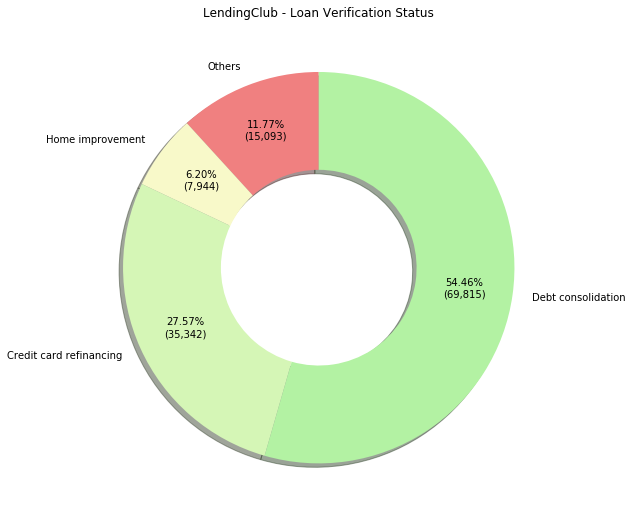

In [89]:
_title = dict(df["title"].value_counts().iteritems())

labels = list(_title.keys())[:3]
val = list(_title.values())[:3]

labels.append("Others")
val.append(sum(list(_title.values())[3:]))

labels = labels[::-1]
val = val[::-1]

plt.figure(figsize=(16,9))

vmin = 0
vmax = len(val)

_NORMALIZE = Normalize(vmin=vmin, vmax=vmax)
custom_color_range = [[_NORMALIZE(vmin), "lightcoral"],
                      [_NORMALIZE(vmax/5), "lemonchiffon"],
                      [_NORMALIZE(vmax), "lightgreen"]]

# _COLORMAP = plt.cm.ScalarMappable(cmap=plt.cm.Wistia)
_COLORMAP = LinearSegmentedColormap.from_list("", custom_color_range, N=vmax+1)

colors = _COLORMAP(list(range(0, vmax)))
# lightcoral
# lightgreen

plt.pie(val, labels=labels, autopct=lambda p : '{:.2f}%\n({:,.0f})'.format(p,p * sum(val)/100), pctdistance=.75, wedgeprops=dict(width=0.5), colors=colors, startangle=90, shadow=True)
plt.title("LendingClub - Loan Verification Status")

plt.show()

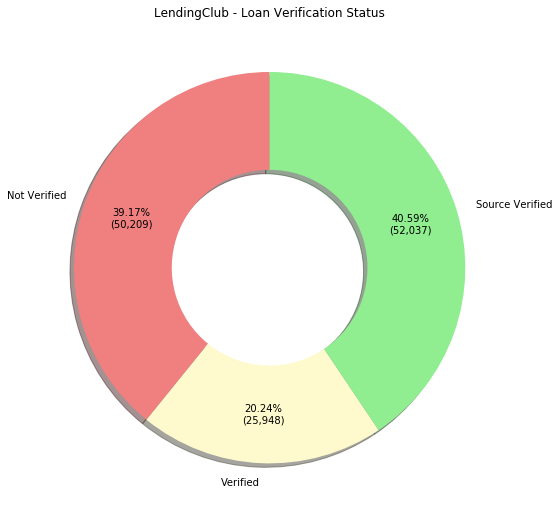

In [81]:
_verification_status = dict(df["verification_status"].value_counts().iteritems())

labels = ["Source Verified", "Verified", "Not Verified"][::-1]
val = [_verification_status[l] for l in labels]

plt.figure(figsize=(16,9))

colors = ["lightgreen", "lemonchiffon", "lightcoral"][::-1]
# lightcoral
# lightgreen

plt.pie(val, labels=labels, autopct=lambda p : '{:.2f}%\n({:,.0f})'.format(p,p * sum(val)/100), pctdistance=.75, wedgeprops=dict(width=0.5), colors=colors, startangle=90, shadow=True)
plt.title("LendingClub - Loan Verification Status")

plt.show()